In [34]:
 # importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [36]:
#loading the data set 
file_path1 =r"C:\Users\JOJO\Downloads\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv"# dataset is taken from the UCI Repository
file_path2 =r"C:\Users\JOJO\Downloads\diabetes+130-us+hospitals+for+years+1999-2008\IDS_mapping.csv"#  two csv  files are there to work 
df1 = pd.read_csv(file_path1) 
df2 = pd.read_csv(file_path2)

In [38]:
#trying to  combine  both df to one dataframe so that we can easliy use it 
data = pd.concat([df1, df2], ignore_index=True)
data['Target'] = data.readmitted
# Displaying the first few rows to check
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6,25.0,1.0,1.0,...,No,No,No,No,No,No,No,NO,NaN,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1,1.0,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,NaN,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1,1.0,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,NaN,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1,1.0,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1,1.0,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
5,35754.0,82637451.0,Caucasian,Male,[50-60),?,2,1.0,2.0,3.0,...,No,No,No,No,No,No,Yes,>30,NaN,>30
6,55842.0,84259809.0,Caucasian,Male,[60-70),?,3,1.0,2.0,4.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
7,63768.0,114882984.0,Caucasian,Male,[70-80),?,1,1.0,7.0,5.0,...,No,No,No,No,No,No,Yes,>30,NaN,>30
8,12522.0,48330783.0,Caucasian,Female,[80-90),?,2,1.0,4.0,13.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
9,15738.0,63555939.0,Caucasian,Female,[90-100),?,3,3.0,4.0,12.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO


In [4]:
df= pd.DataFrame(data)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6,25.0,1.0,1.0,...,No,No,No,No,No,No,No,NO,NaN,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1,1.0,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,NaN,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1,1.0,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,NaN,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1,1.0,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1,1.0,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer from hospital inpt/same fac reslt in...,NaN
101829,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Born inside this hospital,NaN
101830,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Born outside this hospital,NaN
101831,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer from Ambulatory Surgery Center,NaN


In [40]:
# Drop rows where critical columns are NaN (e.g., race, gender, age)
df = df.dropna(subset=['race', 'gender', 'age'])

# Optional: Drop the 'description' column if it doesn't help modeling
df = df.drop(columns=['description'], errors='ignore')

# Double-check shape after cleanup
print("Shape after removing invalid rows:", df.shape)


Shape after removing invalid rows: (101766, 49)


In [42]:
df = df.drop(columns=['readmitted'], errors='ignore')
df.rename(columns={'Target': 'readmitted'}, inplace=True)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  float64
 1   patient_nbr               101766 non-null  float64
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  float64
 6   discharge_disposition_id  101766 non-null  float64
 7   admission_source_id       101766 non-null  float64
 8   time_in_hospital          101766 non-null  float64
 9   payer_code                101766 non-null  object 
 10  medical_specialty         101766 non-null  object 
 11  num_lab_procedures        101766 non-null  float64
 12  num_procedures            101766 non-null  float64
 13  num_medications           101766 non-null  float6

In [46]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [48]:
# as we have missing values we need to fill in missing values with the mean, median, mode, or a constant value.
#Impute missing values

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [50]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitaz

In [52]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabetesMed
count,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05,101766.0,101766.0,1.017660e+05,1.017660e+05,1.017660e+05,1.017660e+05
mean,-1.429939e-16,4.468559e-16,7.172037e-16,3.697732e-16,-2.659840e-16,-2.681135e-16,5.066228e-16,-2.625278e-17,-3.172677e-16,0.0,0.0,1.145068e-17,1.675710e-16,1.731567e-16,1.036147e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.0,0.0,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.946163e+00,-2.153369e+00,-9.006045e-01,-8.091593e-01,-1.381994e+00,-1.627015e+00,-2.129518e+00,-1.015842e+00,-3.047435e+00,0.0,0.0,-7.074638e-01,-1.981648e+00,-9.265905e-01,-1.829868e+00
25%,-7.044982e-01,-6.427440e-01,-9.006045e-01,-8.091593e-01,-1.381994e+00,-8.306799e-01,-6.183917e-01,-1.015842e+00,-7.435160e-01,0.0,0.0,-7.074638e-01,-9.463138e-01,-9.265905e-01,5.464875e-01
50%,4.787394e-02,-8.223168e-03,-9.006045e-01,-8.091593e-01,4.813875e-01,1.455806e-01,4.361953e-02,3.075063e-01,2.094559e-02,0.0,0.0,-7.074638e-01,1.485234e-01,-9.265905e-01,5.464875e-01
75%,7.253075e-01,8.760386e-01,1.126636e+00,1.101527e+00,4.813875e-01,7.725845e-01,7.077677e-01,8.711617e-01,6.551492e-01,0.0,0.0,1.265564e+00,8.857144e-01,1.079225e+00,5.464875e-01
max,2.128057e+00,2.325268e+00,1.701554e+00,1.543670e+00,2.090234e+00,1.893812e+00,2.709012e+00,1.578789e+00,2.144962e+00,0.0,0.0,1.611886e+00,6.094531e+00,1.079225e+00,5.464875e-01


In [12]:
df.shape

(101766, 50)

In [13]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [14]:
num_column = df.select_dtypes(include= ['number']).columns

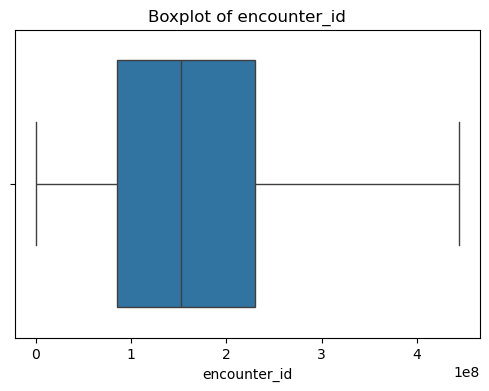

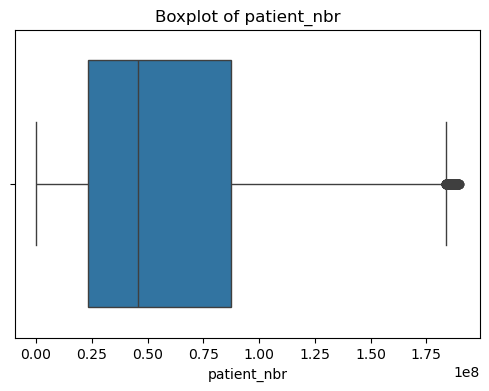

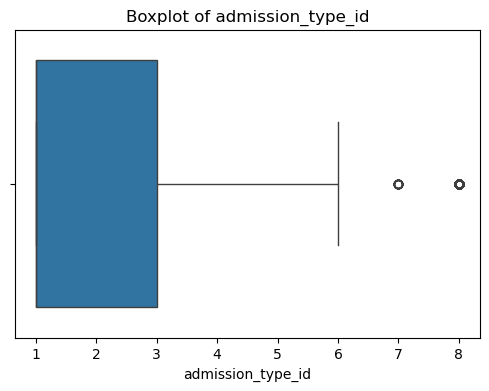

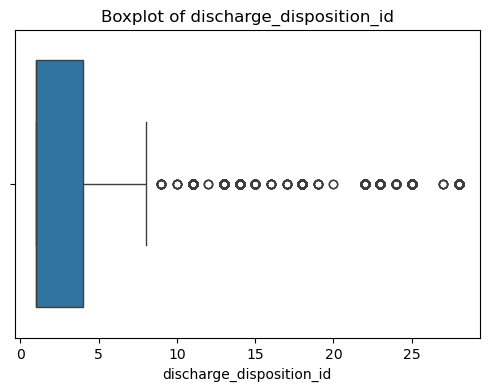

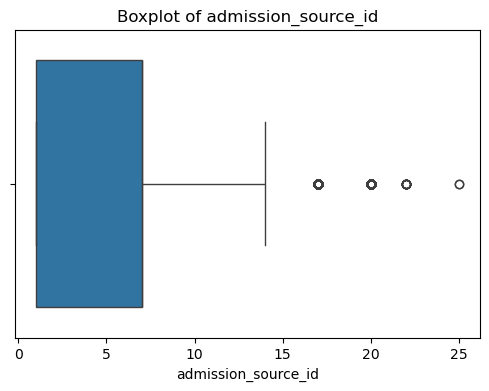

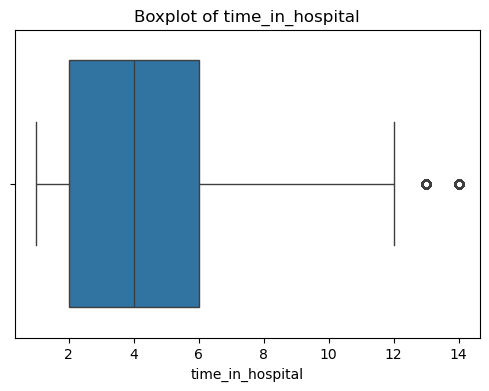

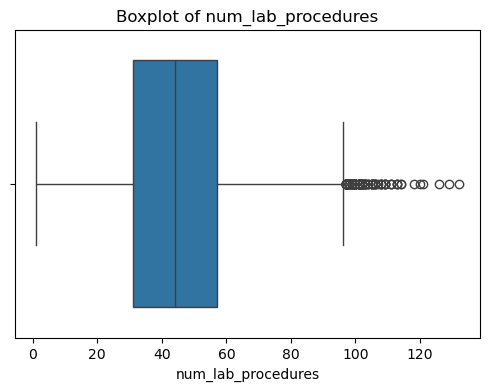

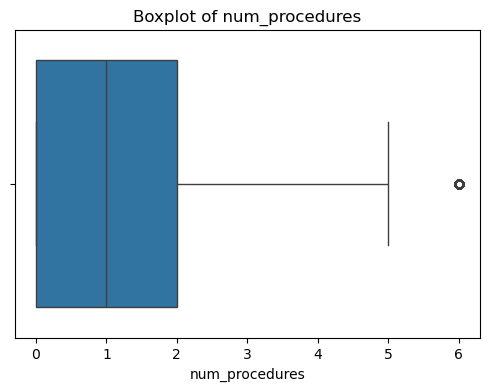

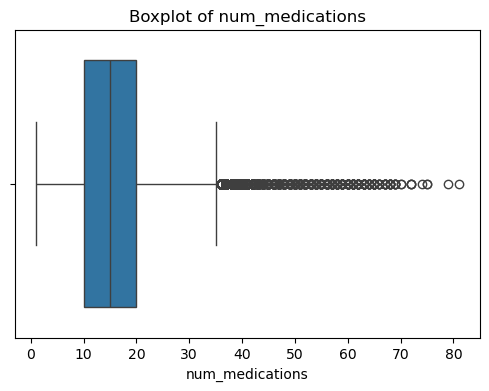

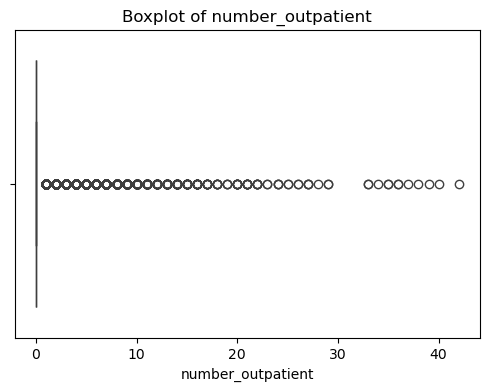

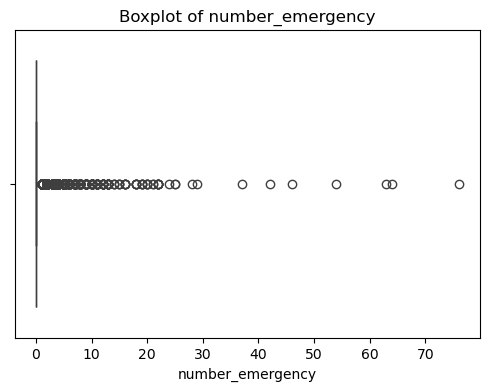

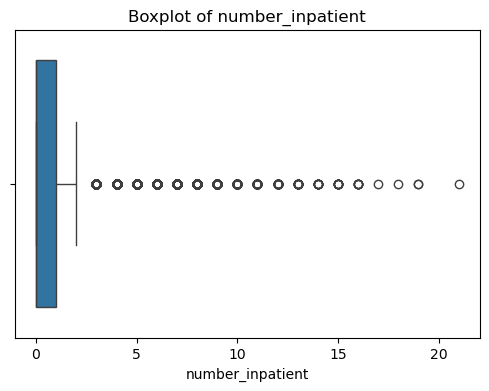

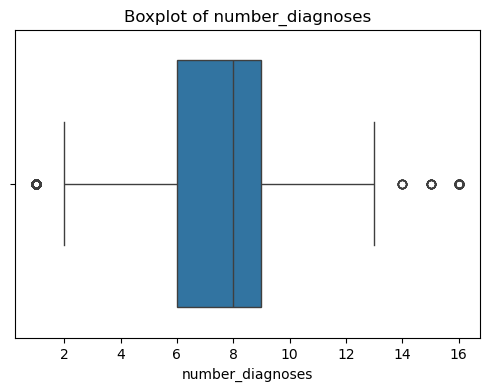

In [15]:
#outliears
num_columns = df.select_dtypes(include=['number']).columns

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [16]:
#correcting outliears
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df 

In [17]:
df1 = outliers(df)

In [18]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,8.5,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


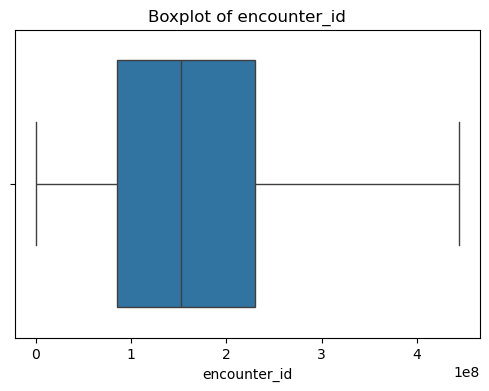

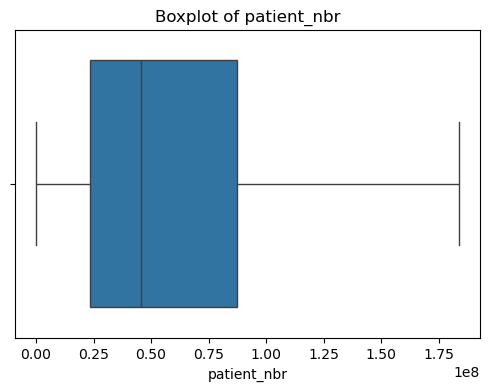

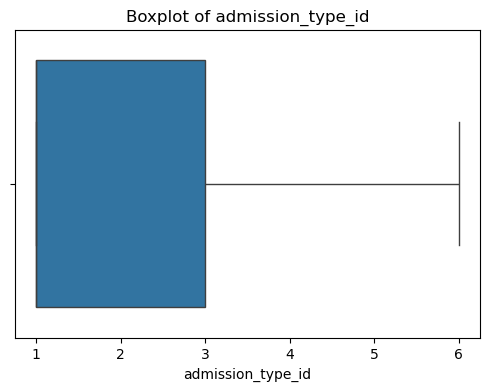

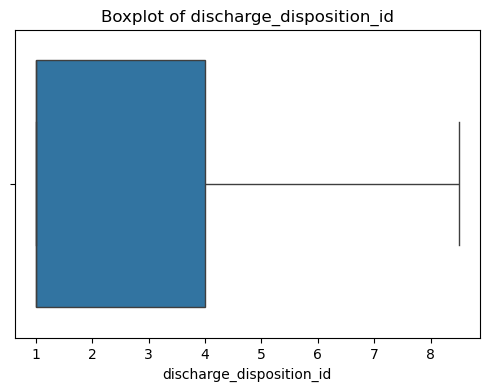

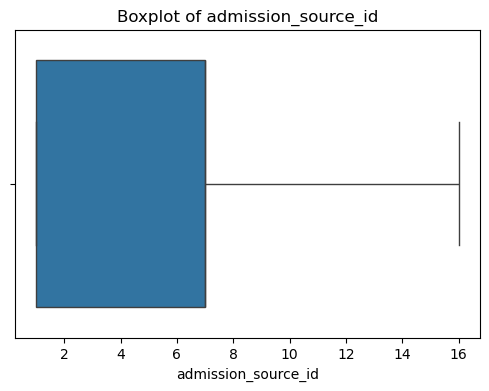

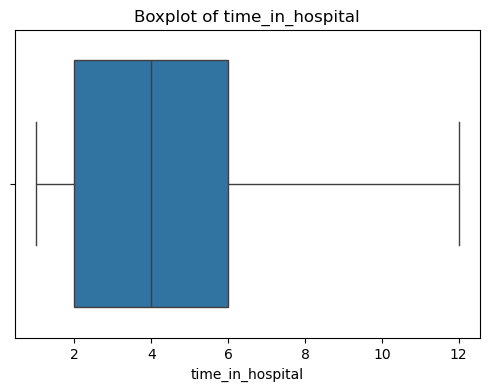

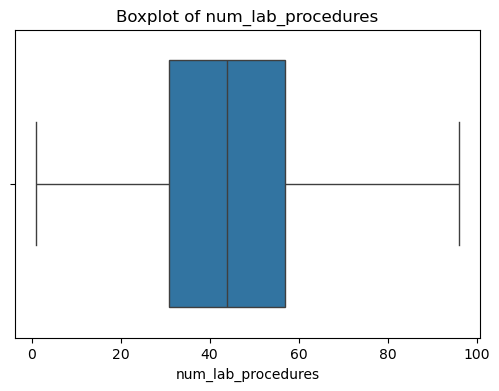

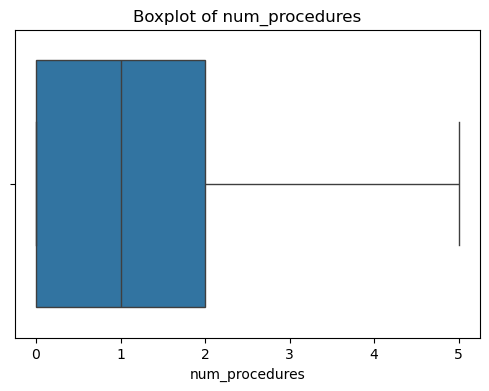

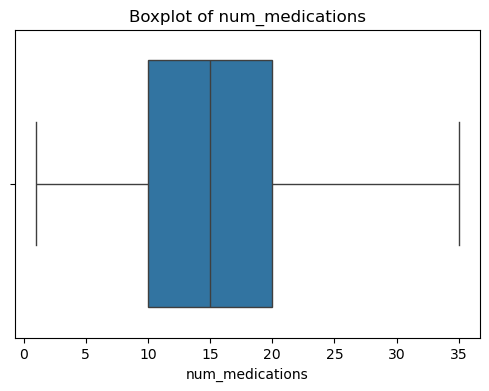

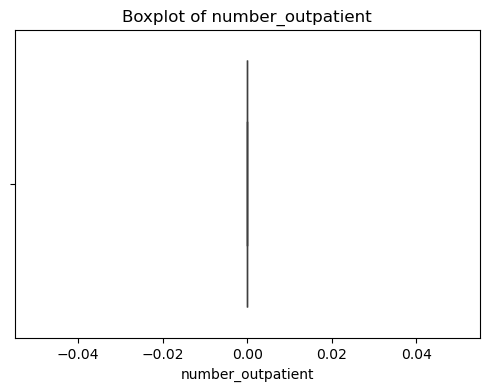

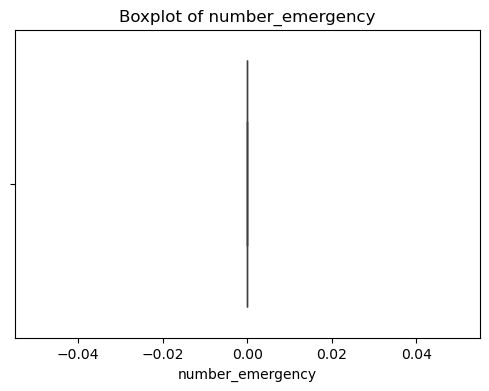

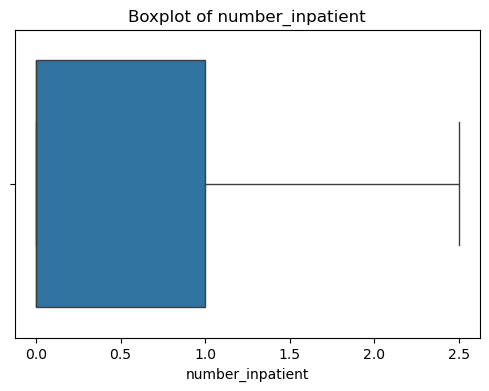

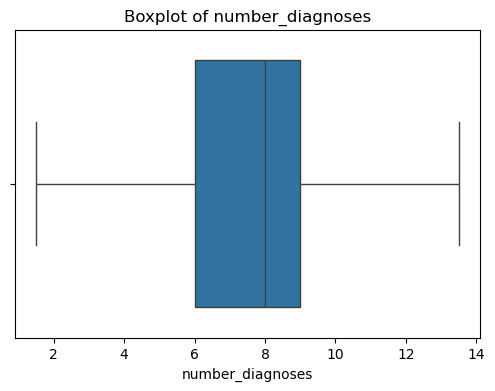

In [19]:
num_columns = df1.select_dtypes(include=['number']).columns

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [20]:
df1.weight

0         ?
1         ?
2         ?
3         ?
4         ?
         ..
101761    ?
101762    ?
101763    ?
101764    ?
101765    ?
Name: weight, Length: 101766, dtype: object

In [21]:
df1.drop(columns=['weight'], inplace=True, errors='ignore')


In [22]:
#encoding
df['change'] = df['change'].map({'No': 0, 'Ch': 1})
df['diabetesMed'] = df['diabetesMed'].map({'No': 0, 'Yes': 1})


In [23]:
# Identify categorical columns (excluding target and already encoded binary)
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'readmitted']

# One-hot encode them
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (101766, 2426)


In [24]:
#defining target 
# Rename 'Target' to 'readmitted' for consistency
df.rename(columns={'Target': 'readmitted'}, inplace=True)

# Just to be safe, ensure it's binary
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


In [25]:
#checking for class imbalance
# Count of each class
print(df['readmitted'].value_counts())

# Percent distribution
print(df['readmitted'].value_counts(normalize=True))


readmitted
0    90409
1    11357
Name: count, dtype: int64
readmitted
0    0.888401
1    0.111599
Name: proportion, dtype: float64


In [26]:
# checking for skewness
X = df1.drop('readmitted', axis =1)
y =df1['readmitted']

In [27]:
X.skew

<bound method DataFrame.skew of         encounter_id  patient_nbr             race  gender      age  \
0          2278392.0    8222157.0        Caucasian  Female   [0-10)   
1           149190.0   55629189.0        Caucasian  Female  [10-20)   
2            64410.0   86047875.0  AfricanAmerican  Female  [20-30)   
3           500364.0   82442376.0        Caucasian    Male  [30-40)   
4            16680.0   42519267.0        Caucasian    Male  [40-50)   
...              ...          ...              ...     ...      ...   
101761   443847548.0  100162476.0  AfricanAmerican    Male  [70-80)   
101762   443847782.0   74694222.0  AfricanAmerican  Female  [80-90)   
101763   443854148.0   41088789.0        Caucasian    Male  [70-80)   
101764   443857166.0   31693671.0        Caucasian  Female  [80-90)   
101765   443867222.0  175429310.0        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                     6.0              

In [28]:
pt = PowerTransformer(method = 'yeo-johnson')

In [29]:
num_columns = df1.select_dtypes(include=['number']).columns

In [30]:
df1[num_columns] = pt.fit_transform(df1[num_columns])
print(df1[num_columns].skew())

encounter_id               -0.067982
patient_nbr                -0.285725
admission_type_id           0.370229
discharge_disposition_id    0.511740
admission_source_id        -0.088343
time_in_hospital            0.008792
num_lab_procedures         -0.232589
num_procedures              0.195867
num_medications            -0.009406
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.724108
number_diagnoses           -0.329176
change                      0.152637
diabetesMed                -1.283399
readmitted                  2.467071
dtype: float64


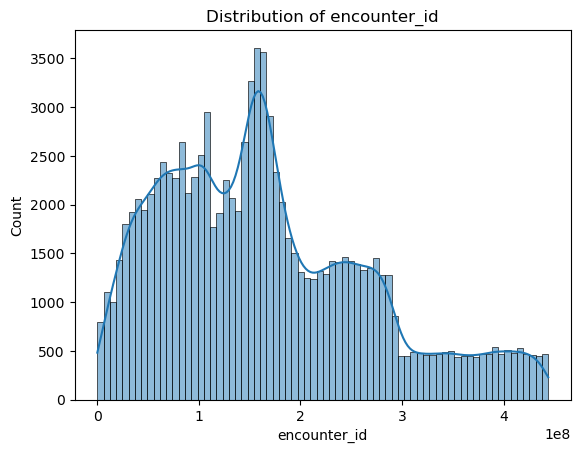

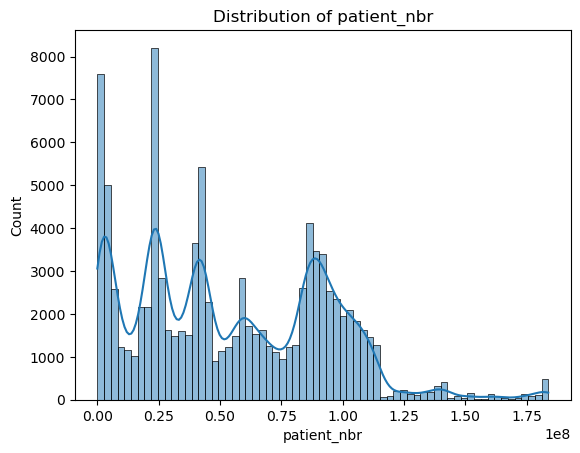

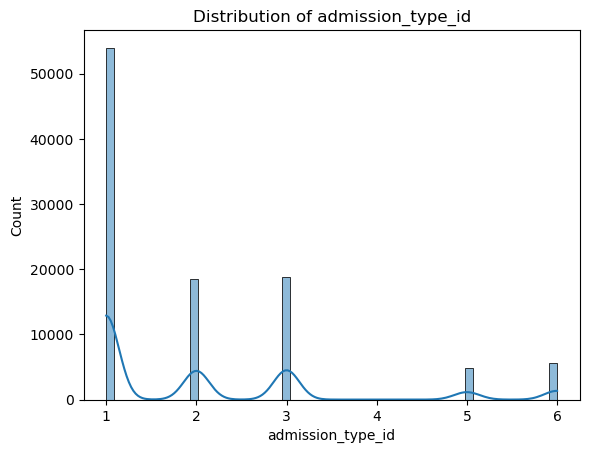

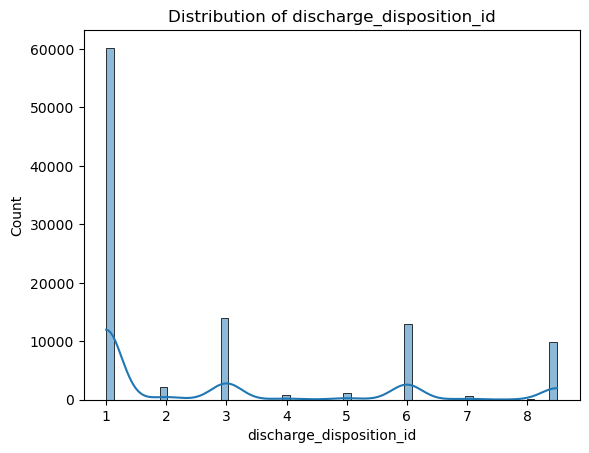

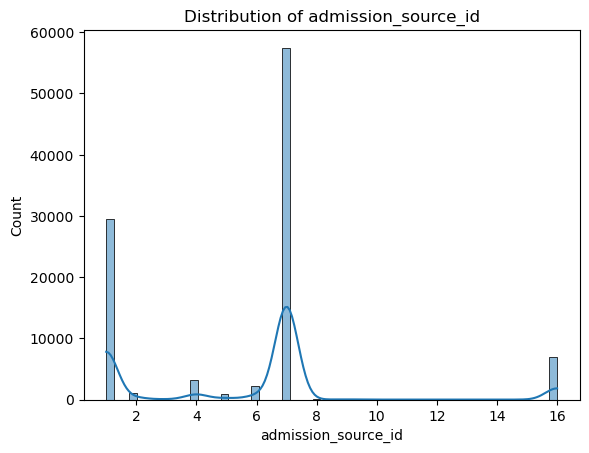

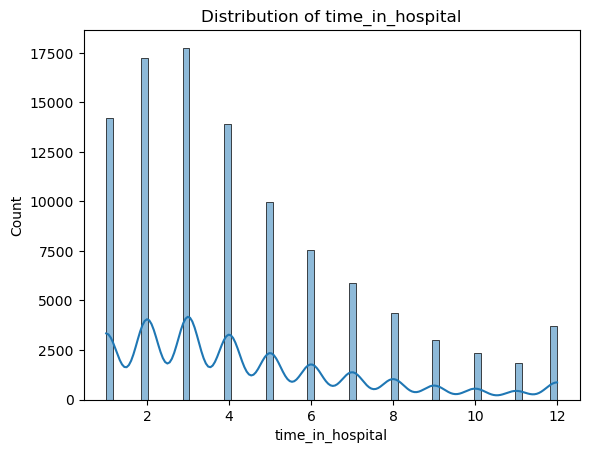

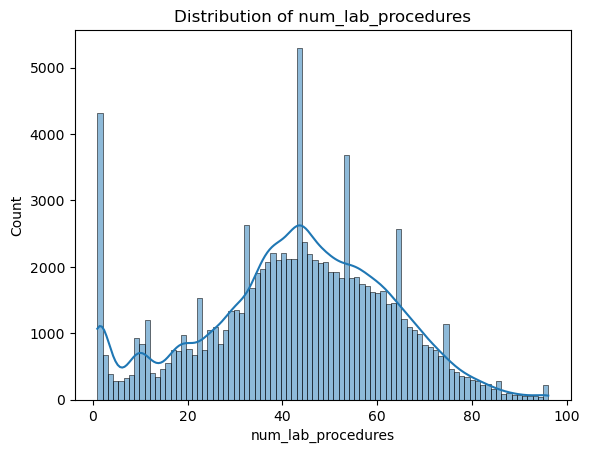

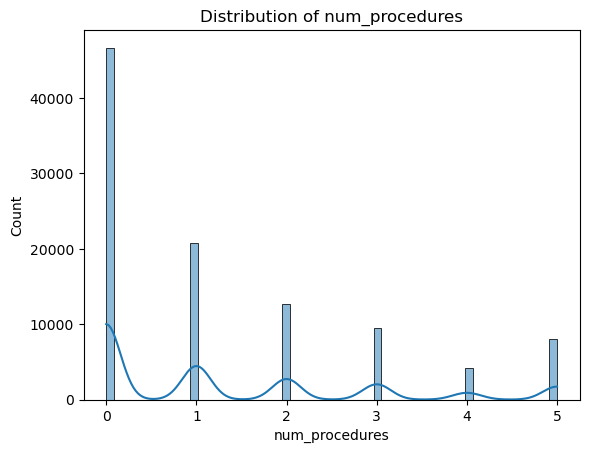

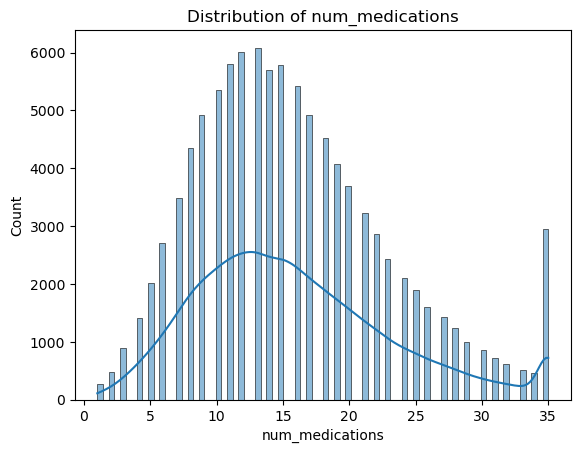

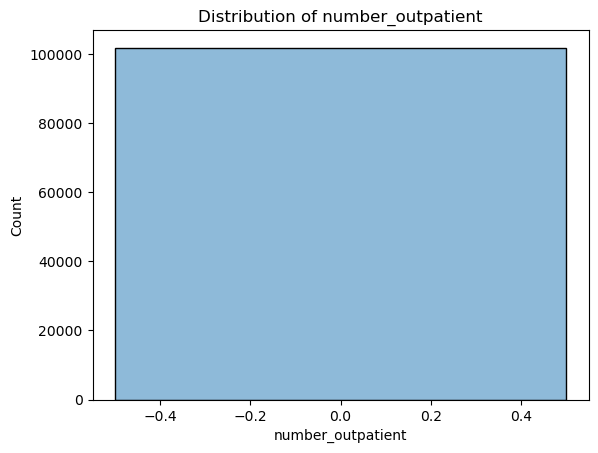

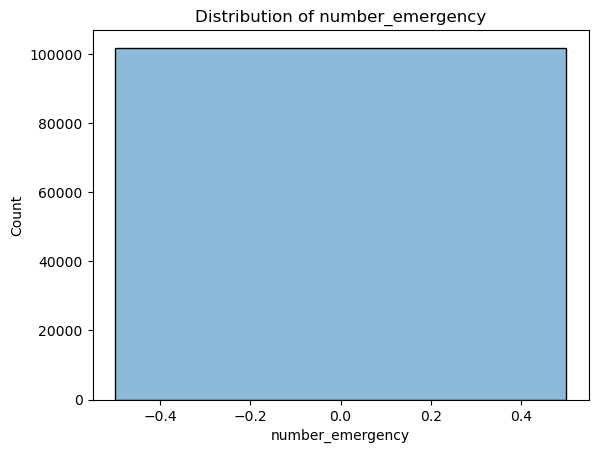

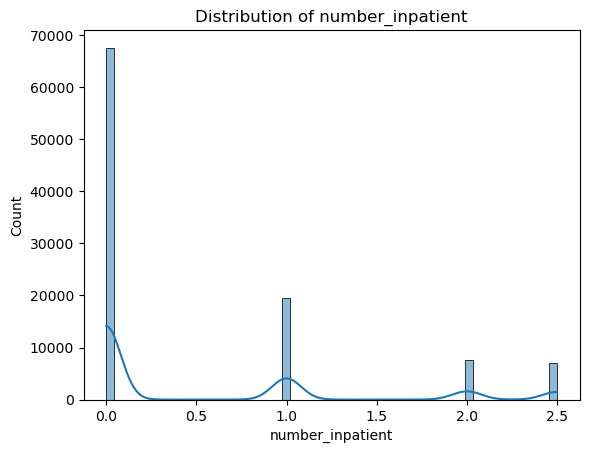

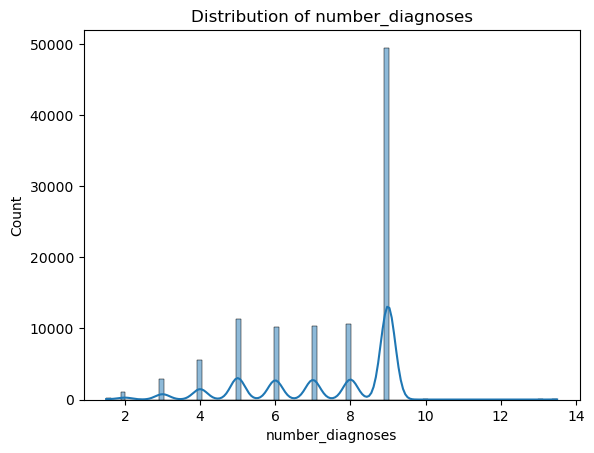

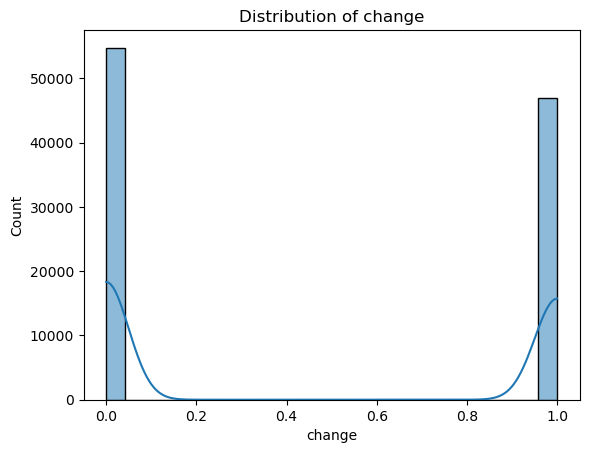

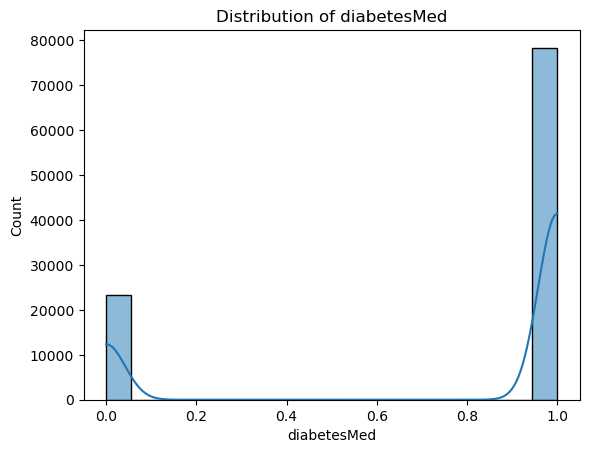

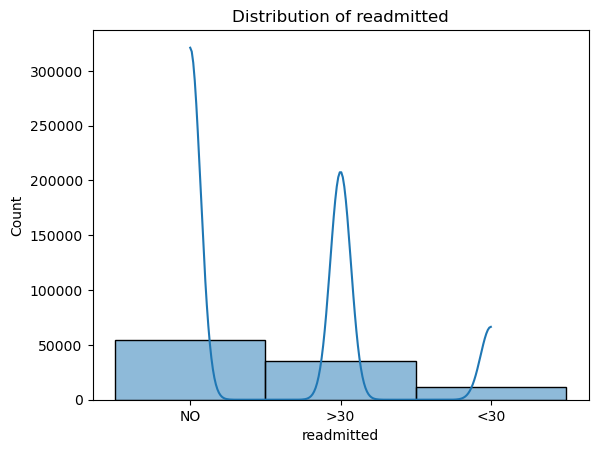

In [31]:
for i in num_columns:
    sns.histplot(data=df_encoded, x=i, kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()


In [32]:
print(num_columns)
print(X.columns)


Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'tr

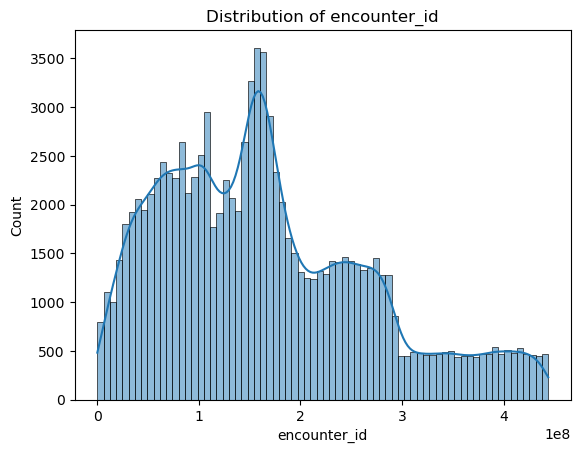

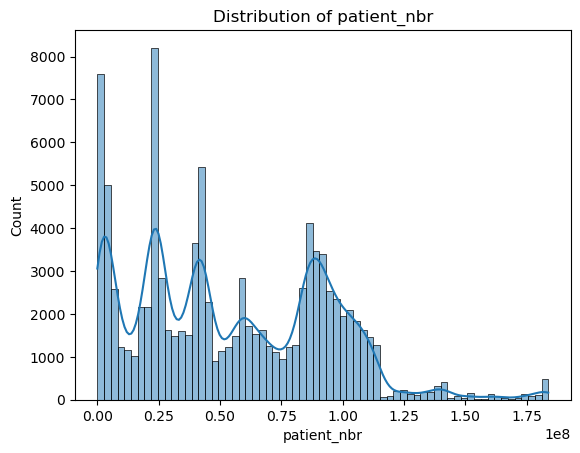

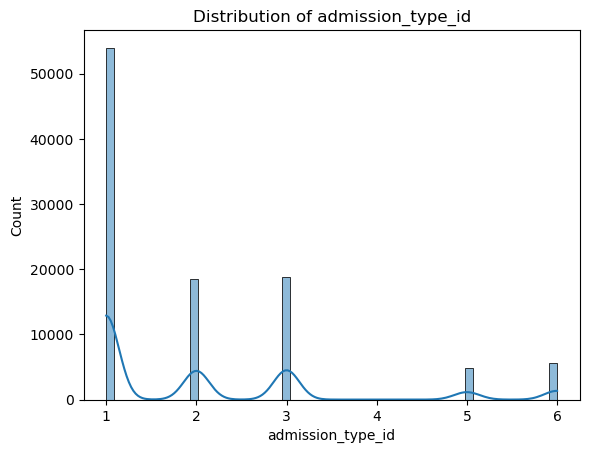

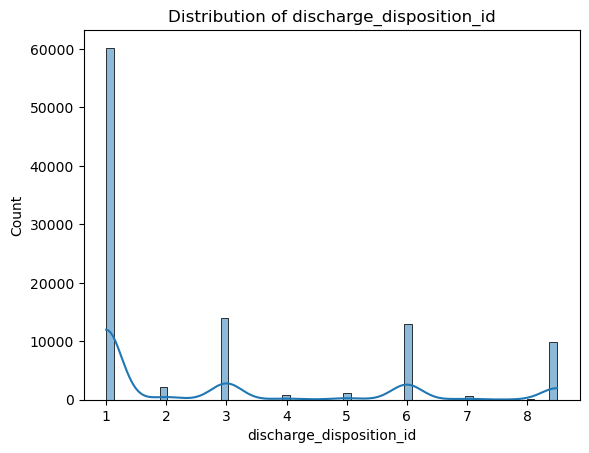

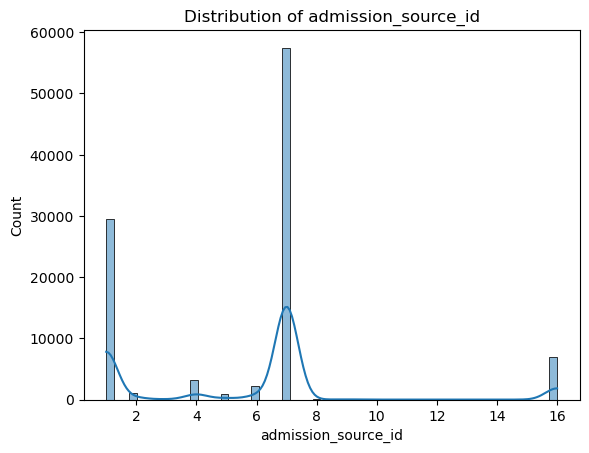

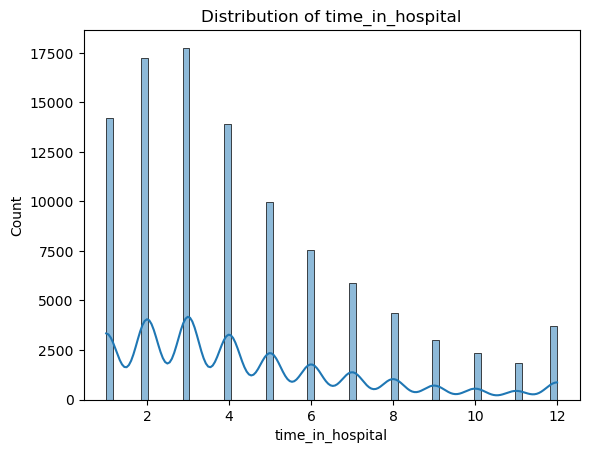

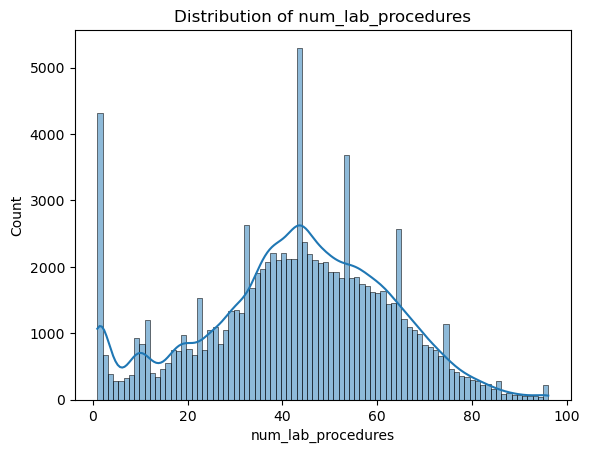

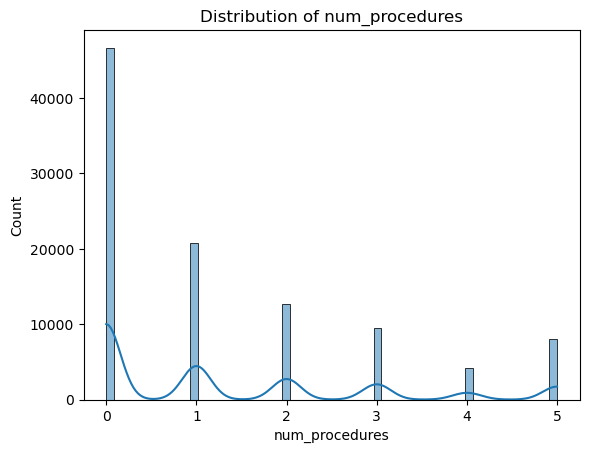

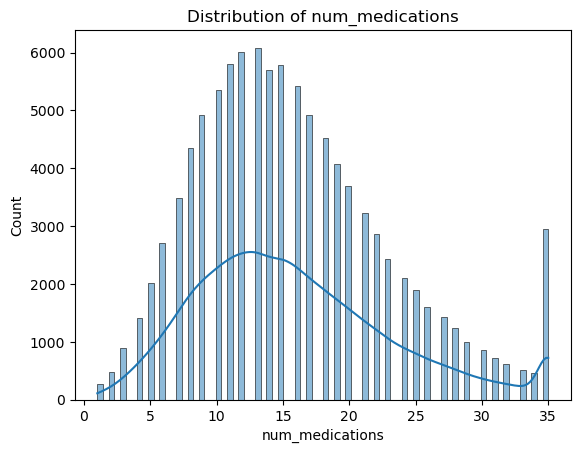

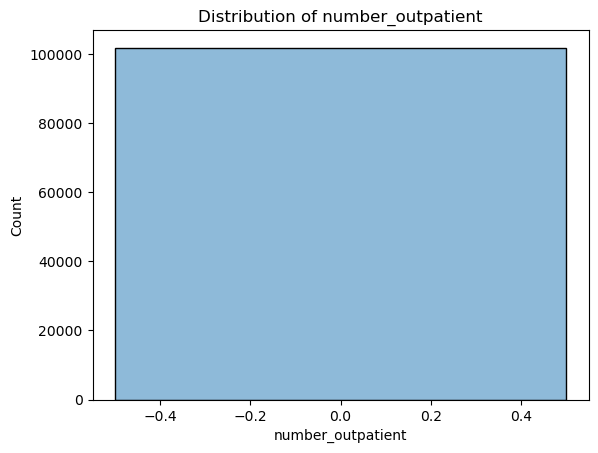

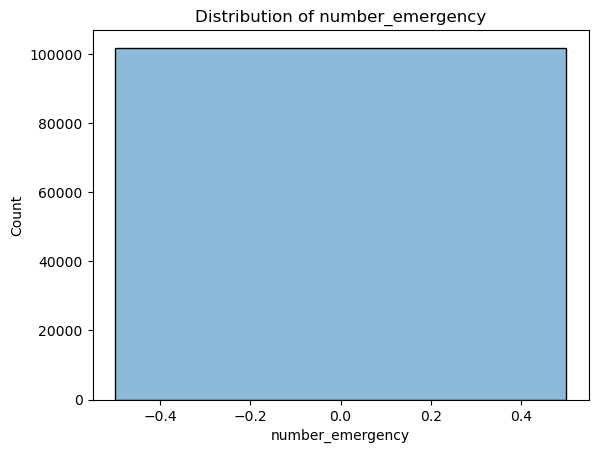

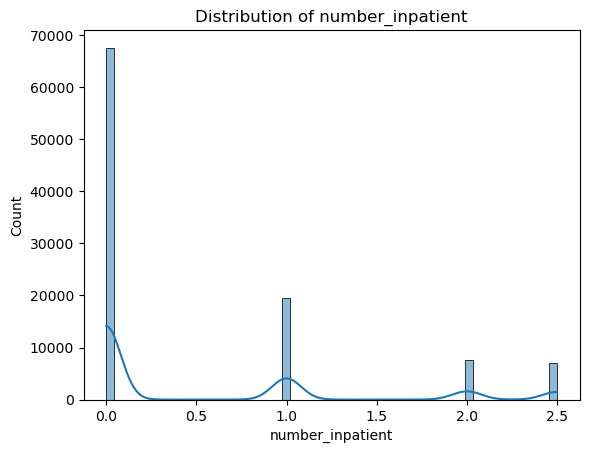

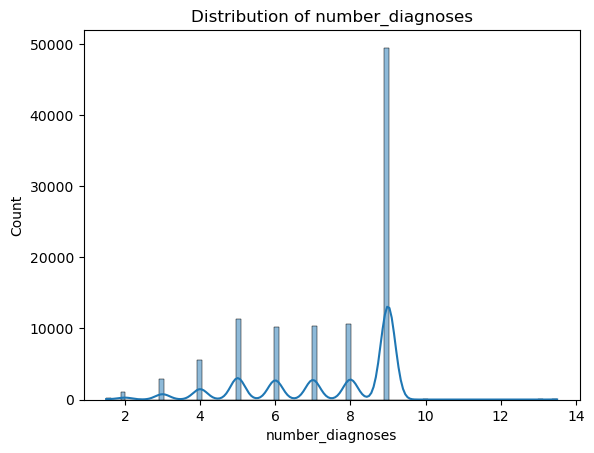

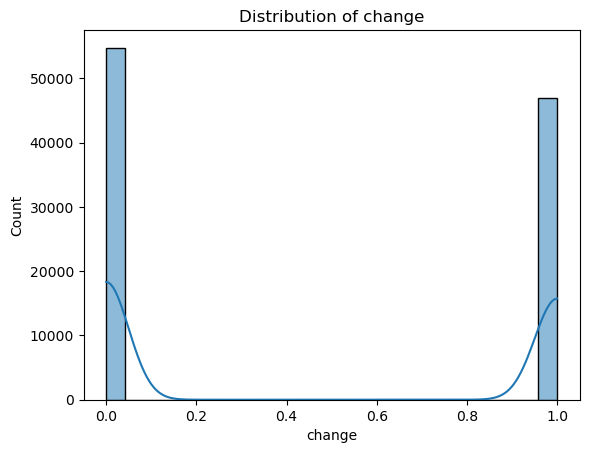

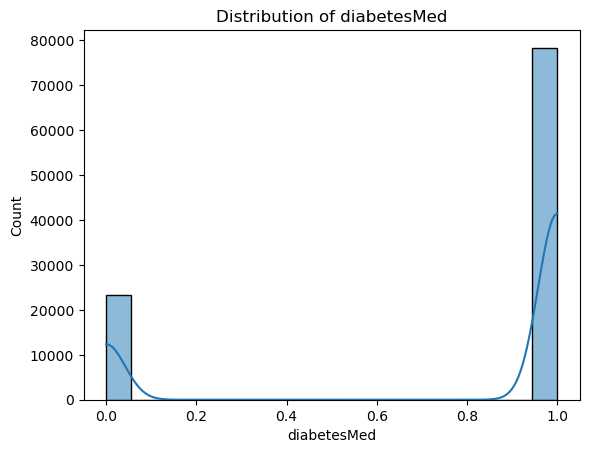

ValueError: Could not interpret value `readmitted` for `x`. An entry with this name does not appear in `data`.

In [33]:
for i in num_columns:
    sns.histplot(data =X,x=i,kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [54]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

# Train-test split (stratify to preserve class ratio in test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE:")
print(y_train_bal.value_counts())


After SMOTE:
readmitted
>30    43891
NO     43891
<30    43891
Name: count, dtype: int64


In [57]:
print(df_encoded['readmitted'].dtype)
print('readmitted' in df_encoded.columns)


object
True


In [60]:
# Map text values to binary (target definition)
df_encoded['readmitted'] = df_encoded['readmitted'].map({
    'NO': 0,
    '>30': 0,
    '<30': 1
})


In [62]:
print(df_encoded['readmitted'].unique())


[0 1]


In [64]:
# Confirm it's int type
df_encoded['readmitted'] = df_encoded['readmitted'].astype(int)

# Select only numeric columns (now readmitted is included)
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation with target
corr_with_target = corr_matrix['readmitted'].sort_values(ascending=False)
print(corr_with_target.head(10))


readmitted                  1.000000
number_inpatient            0.148074
number_diagnoses            0.049662
discharge_disposition_id    0.049235
time_in_hospital            0.045065
num_medications             0.041583
diabetesMed                 0.027125
num_lab_procedures          0.020351
change                      0.019506
patient_nbr                 0.007906
Name: readmitted, dtype: float64


In [66]:
# Dropping the specified columns
df[df_encoded.drop(columns=['number_emergency', 'number_outpatient'], inplace=True)]

# Verify the columns are dropped
print(df_encoded.columns)


KeyError: None

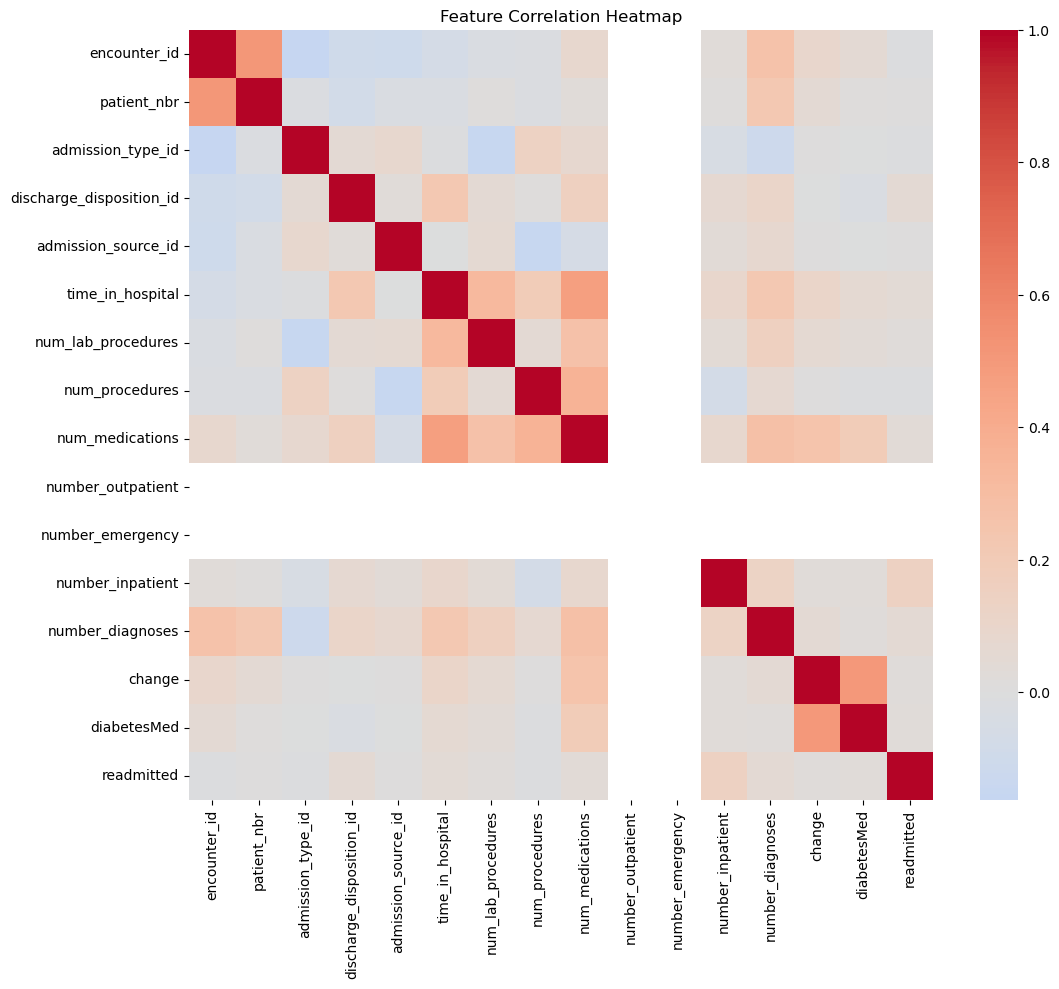

In [68]:
# Select only features that are strongly correlated (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [70]:
top_features = corr_with_target.index[1:6]  # Skip 'readmitted' itself
X = df_encoded[top_features]
y = df_encoded['readmitted']


In [72]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [74]:
#feature selection
from sklearn.feature_selection import SelectKBest,f_classif

In [76]:
sk = SelectKBest(score_func=f_classif,k=10)

In [78]:
k_best = sk.fit_transform(X,y)

C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=5. All the features will be returned.
  warnings.warn(


In [80]:
selected_features = X.columns[sk.get_support()]

In [82]:
selected_features

Index(['number_inpatient', 'number_diagnoses', 'discharge_disposition_id',
       'time_in_hospital', 'num_medications'],
      dtype='object')

In [84]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score'    : sk.scores_ }).sort_values(by= 'Score',ascending = False)

In [86]:
feature_score

,Features,Score
0,number_inpatient,2281.299980
1,number_diagnoses,251.607521
2,discharge_disposition_id,247.286273
3,time_in_hospital,207.088588
4,num_medications,176.271889


In [88]:
X_sel = X[selected_features]

In [90]:
X_sel.columns

Index(['number_inpatient', 'number_diagnoses', 'discharge_disposition_id',
       'time_in_hospital', 'num_medications'],
      dtype='object')

In [92]:
sc = StandardScaler()

In [94]:
X.scaled = sc.fit_transform(X_sel)

C:\Users\JOJO\AppData\Local\Temp\ipykernel_23944\442373628.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.scaled = sc.fit_transform(X_sel)


In [96]:
X_train,X_test,y_train,y_test = train_test_split(X.scaled,y,test_size =0.2,random_state= 42)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [102]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


In [104]:
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOJO\anaconda3\Lib\site-packages\s

In [106]:
# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")


Logistic Regression Results:
Accuracy: 0.8877
Confusion Matrix:
[[18069     0]
 [ 2285     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.00      0.00      0.00      2285

    accuracy                           0.89     20354
   macro avg       0.44      0.50      0.47     20354
weighted avg       0.79      0.89      0.83     20354


Decision Tree Results:
Accuracy: 0.8683
Confusion Matrix:
[[17540   529]
 [ 2151   134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     18069
           1       0.20      0.06      0.09      2285

    accuracy                           0.87     20354
   macro avg       0.55      0.51      0.51     20354
weighted avg       0.81      0.87      0.83     20354


Random Forest Results:
Accuracy: 0.8720
Confusion Matrix:
[[17636   433]
 [ 2172   113]]
Classification Report:
 

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [110]:
#retraining the model
from sklearn.model_selection import train_test_split

X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [112]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [113]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5827847106219908
[[10915  7168]
 [ 1324   947]]
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     18083
           1       0.12      0.42      0.18      2271

    accuracy                           0.58     20354
   macro avg       0.50      0.51      0.45     20354
weighted avg       0.81      0.58      0.66     20354



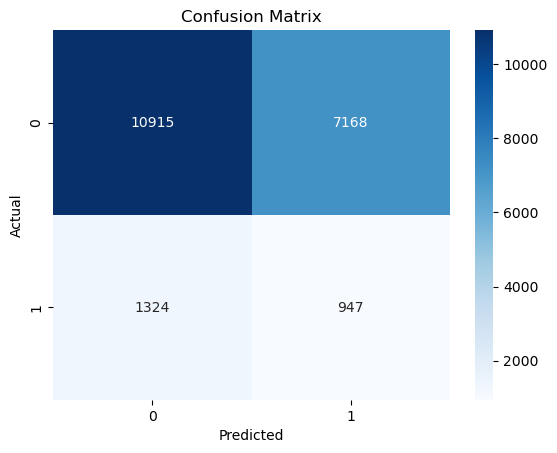

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [144]:
pipeline = Pipeline([
    ('impluter',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())])

In [146]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('impluter', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', LogisticRegression())])

In [124]:
#saving the file
with open("classification_report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))


In [128]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())


Cross-validated scores: [0.53866562 0.66579865 0.3877561  0.50420085 0.8851275 ]
Average score: 0.5963097463212446


In [140]:
import joblib
joblib.dump(model, "Diabetic Readmission.pkl")# saving the model for deployment


['Diabetic Readmission.pkl']

Final Insights from the Diabetes 130-US Hospitals Dataset

Predicting Readmission Is Difficult

* The dataset's target (`readmitted`) is imbalanced: So we balanced the data

  * <30 (readmitted within 30 days) is the minority class.
  * Most patients are either >30 or NO

🔹 Insight: Models may have high accuracy but low recall for high-risk patients

---
Best Models 
Logistic Regression
SVM

🔹 Insight: Despite extensive tuning, predicting readmission within 30 days remains challenging.

---
Top Features Affecting Readmission

Feature importance varies, but commonly:

Number of inpatient visits
Number of emergency visits
Time in hospital
Number of lab procedures
Discharge disposition
Diabetes medication changes

🔹 Insight: Past hospitalizations and medication adjustments are strong predictors of near-term readmission.


